<a href="https://colab.research.google.com/github/JyresaMae/Digital-Signal-Processing/blob/main/Harmonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 2.1:**

A sawtooth signal has a waveform that ramps up linearly from -1 to 1, then drops to -1
and repeats. (See http://en.wikipedia.org/wiki/Sawtooth_wave)
Write a class called SawtoothSignal that extends Signal and provides evaluate to
evaluate a sawtooth signal..
Compute the spectrum of a sawtooth wave. How does the harmonic structure compare
to triangle and square waves?

Simplified version of TriangleSignal.

In [ ]:
from thinkdsp import decorate

In [ ]:
from thinkdsp import Sinusoid
from thinkdsp import normalize, unbias
import numpy as np

class SawtoothSignal(Sinusoid):

    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Here's what it sounds like:

In [ ]:
sawtooth = SawtoothSignal().make_wave(duration=0.5, framerate=50000)
sawtooth.make_audio()

And here's what the spectrum looks like:

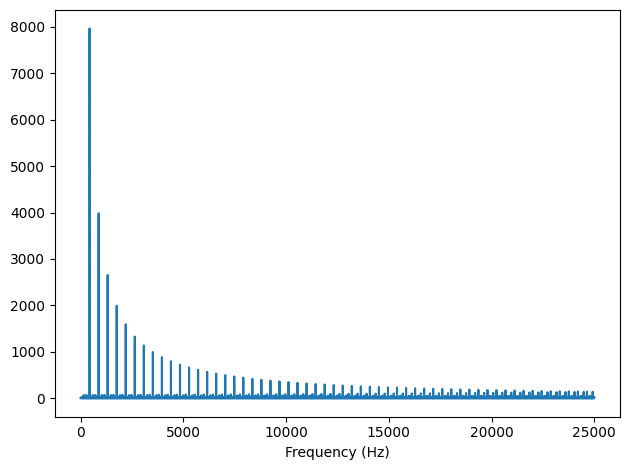

In [ ]:
sawtooth.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Compared to a square wave, the sawtooth drops off similarly, but it includes both even and odd harmonics. Notice that I had to cut the amplitude of the square wave to make them comparable.

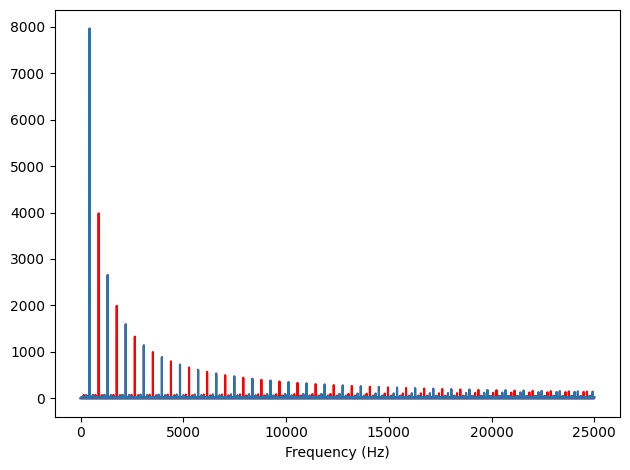

In [ ]:
from thinkdsp import SquareSignal

signal = SquareSignal(200)
sawtooth.make_spectrum().plot(color='red')
square = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=50000)
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

Here's what it sounds like:

In [ ]:
wave2 = signal.make_wave(duration=0.5, framerate=50000)
wave2.apodize()
wave2.make_audio()

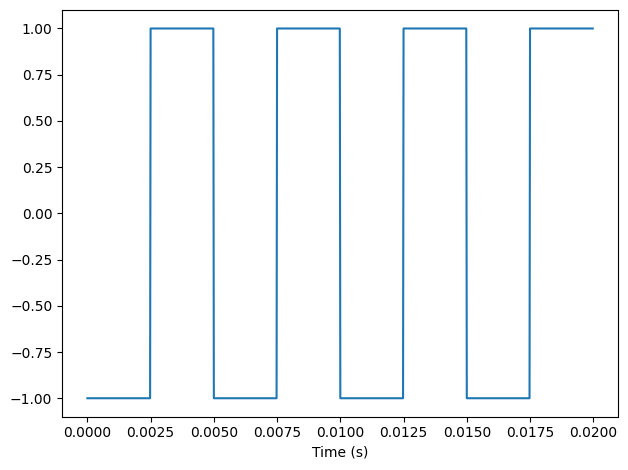

In [ ]:
duration = signal.period*4
segment = signal.make_wave(duration, framerate=50000)
segment.plot()
decorate(xlabel='Time (s)')

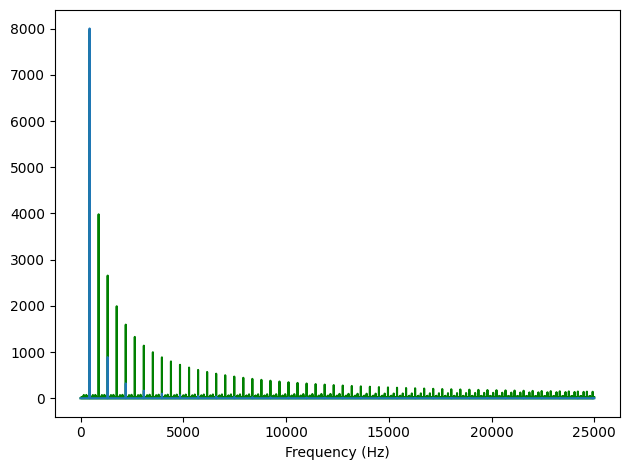

In [ ]:
from thinkdsp import TriangleSignal

signal = TriangleSignal(200)
sawtooth.make_spectrum().plot(color='green')
triangle = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=50000)
triangle.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

In [ ]:
wave3 = signal.make_wave(duration=0.5, framerate=50000)
wave3.apodize()
wave3.make_audio()

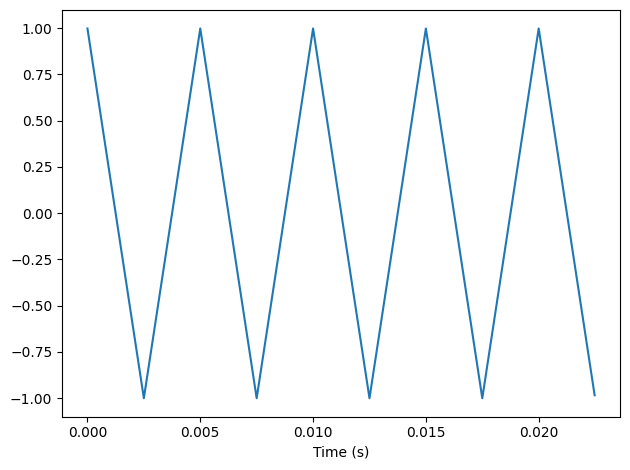

In [ ]:
duration = signal.period*4.5
segment = signal.make_wave(duration, framerate=50000)
segment.plot()
decorate(xlabel='Time (s)')

Specifically, the harmonics of the triangle wave drop off in proportion to  $1/f^2$, while the sawtooth drops off like $1/f$.

Exercise 2

Make a square signal at 1500 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

Here's the square wave:

In [ ]:
square = SquareSignal(1500).make_wave(duration=0.5, framerate=10000)

Here's what the spectrum looks like:

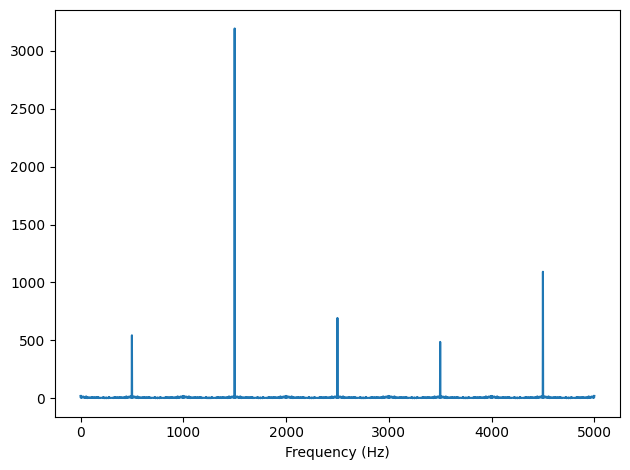

In [ ]:
square.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

You can see the fundamental at 1500 Hz and the first harmonic at 4500 Hz, but the second harmonic, which should be at 7500 Hz, is aliased to 2500 Hz.

The third harmonic, which should be at 10500 Hz, would get aliased to -500 Hz, but that gets aliased again to 500 Hz.

And the 4th harmonic, which should be at 13500 Hz, ends up at 3500 Hz.

The 5th harmonic, which should be at 16500 Hz, ends up at 1500 Hz, so it contributes to the fundamental.

The remaining harmonics overlap with the ones we've already seen.

When you listen to the wave, the fundamental pitch you perceive is the alias at 500 Hz.

In [ ]:
square.make_audio()

If you compare it to this 500 Hz sine wave, you might hear what I mean.

In [ ]:
from thinkdsp import SinSignal

SinSignal(500).make_wave(duration=0.5, framerate=10000).make_audio()

Exercise 3

If you have a spectrum object, `spectrum`, and print the first few values of `spectrum.fs`, you’ll see that the frequencies start at zero. So `spectrum.hs[0]` is the magnitude of the component with frequency 0. But what does that mean?

Try this experiment:

1.    Make a triangle signal with frequency 440 and make a Wave with duration 0.01 seconds. Plot the waveform.
2.    Make a Spectrum object and print `spectrum.hs[0]`. What is the amplitude and phase of this component?
3.    Set `spectrum.hs[0] = 100`. Make a Wave from the modified Spectrum and plot it. What effect does this operation have on the waveform?

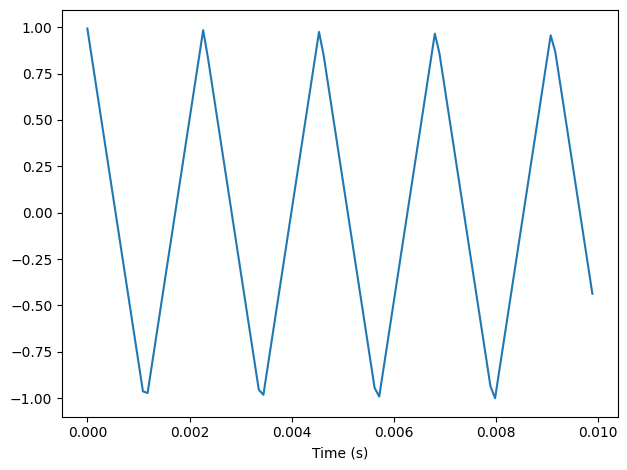

In [ ]:
triangle = TriangleSignal().make_wave(duration=0.01)
triangle.plot()
decorate(xlabel='Time (s)')

In [ ]:
spectrum = triangle.make_spectrum()
spectrum.hs[0]

(1.0436096431476471e-14+0j)

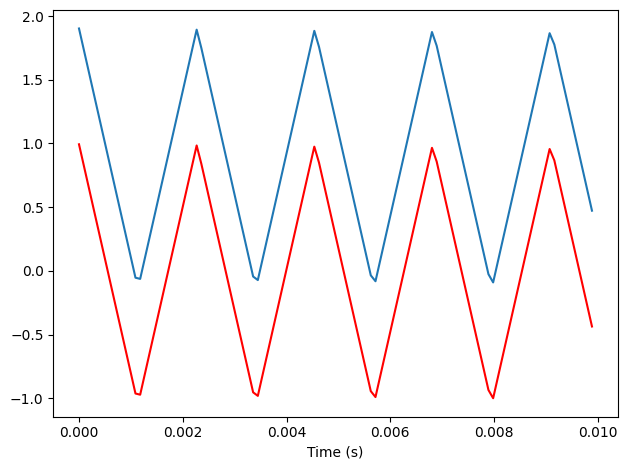

In [ ]:
spectrum.hs[0] = 100
triangle.plot(color='red')
spectrum.make_wave().plot()
decorate(xlabel='Time (s)')

Exercise 2.4

Write a function that takes a Spectrum as a parameter and modifies it by dividing each element of hs by the corresponding frequency from fs. Test your function using one of the WAV files in the repository or any Wave object.

Compute the Spectrum and plot it.
Modify the Spectrum using your function and plot it again.
Make a Wave from the modified Spectrum and listen to it. What effect does this operation have on the signal?

In [ ]:
def filter_spectrum(spectrum):
    spectrum.hs[1:] /= spectrum.fs[1:]
    spectrum.hs[0] = 0

In [ ]:
wave = TriangleSignal(freq=440).make_wave(duration=0.5)
wave.make_audio()

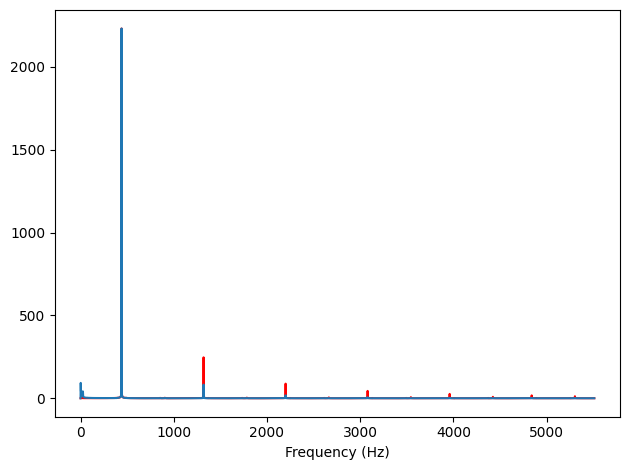

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=10000, color='red')
filter_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

In [ ]:
filtered = spectrum.make_wave()
filtered.make_audio()

### Exercise 2.5

The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could
construct the signal you want by adding up sinusoids, or you
could start with a signal that is similar to what you want and
modify it.

In [ ]:
freq = 500
signal = SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

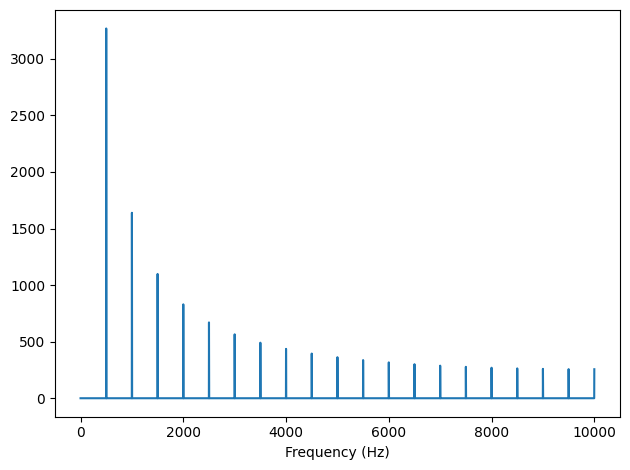

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

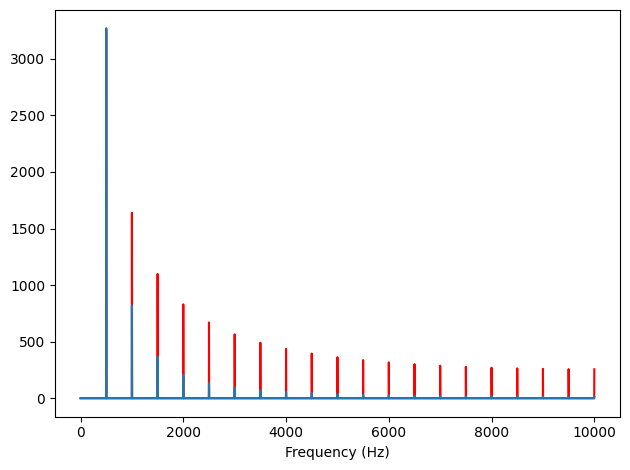

In [ ]:
spectrum.plot(color='red')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [ ]:
wave = spectrum.make_wave()
wave.make_audio()

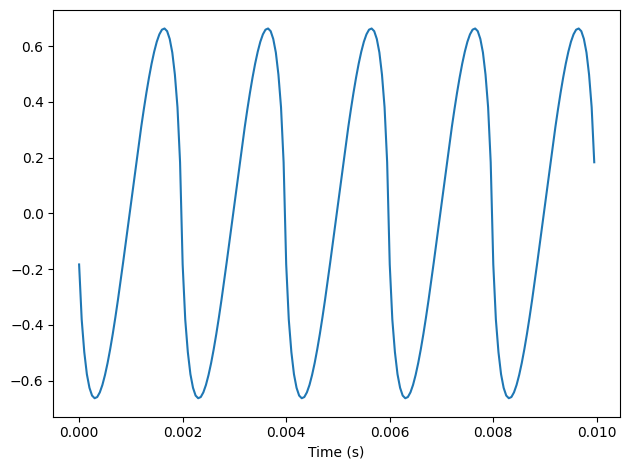

In [ ]:
wave.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')